In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

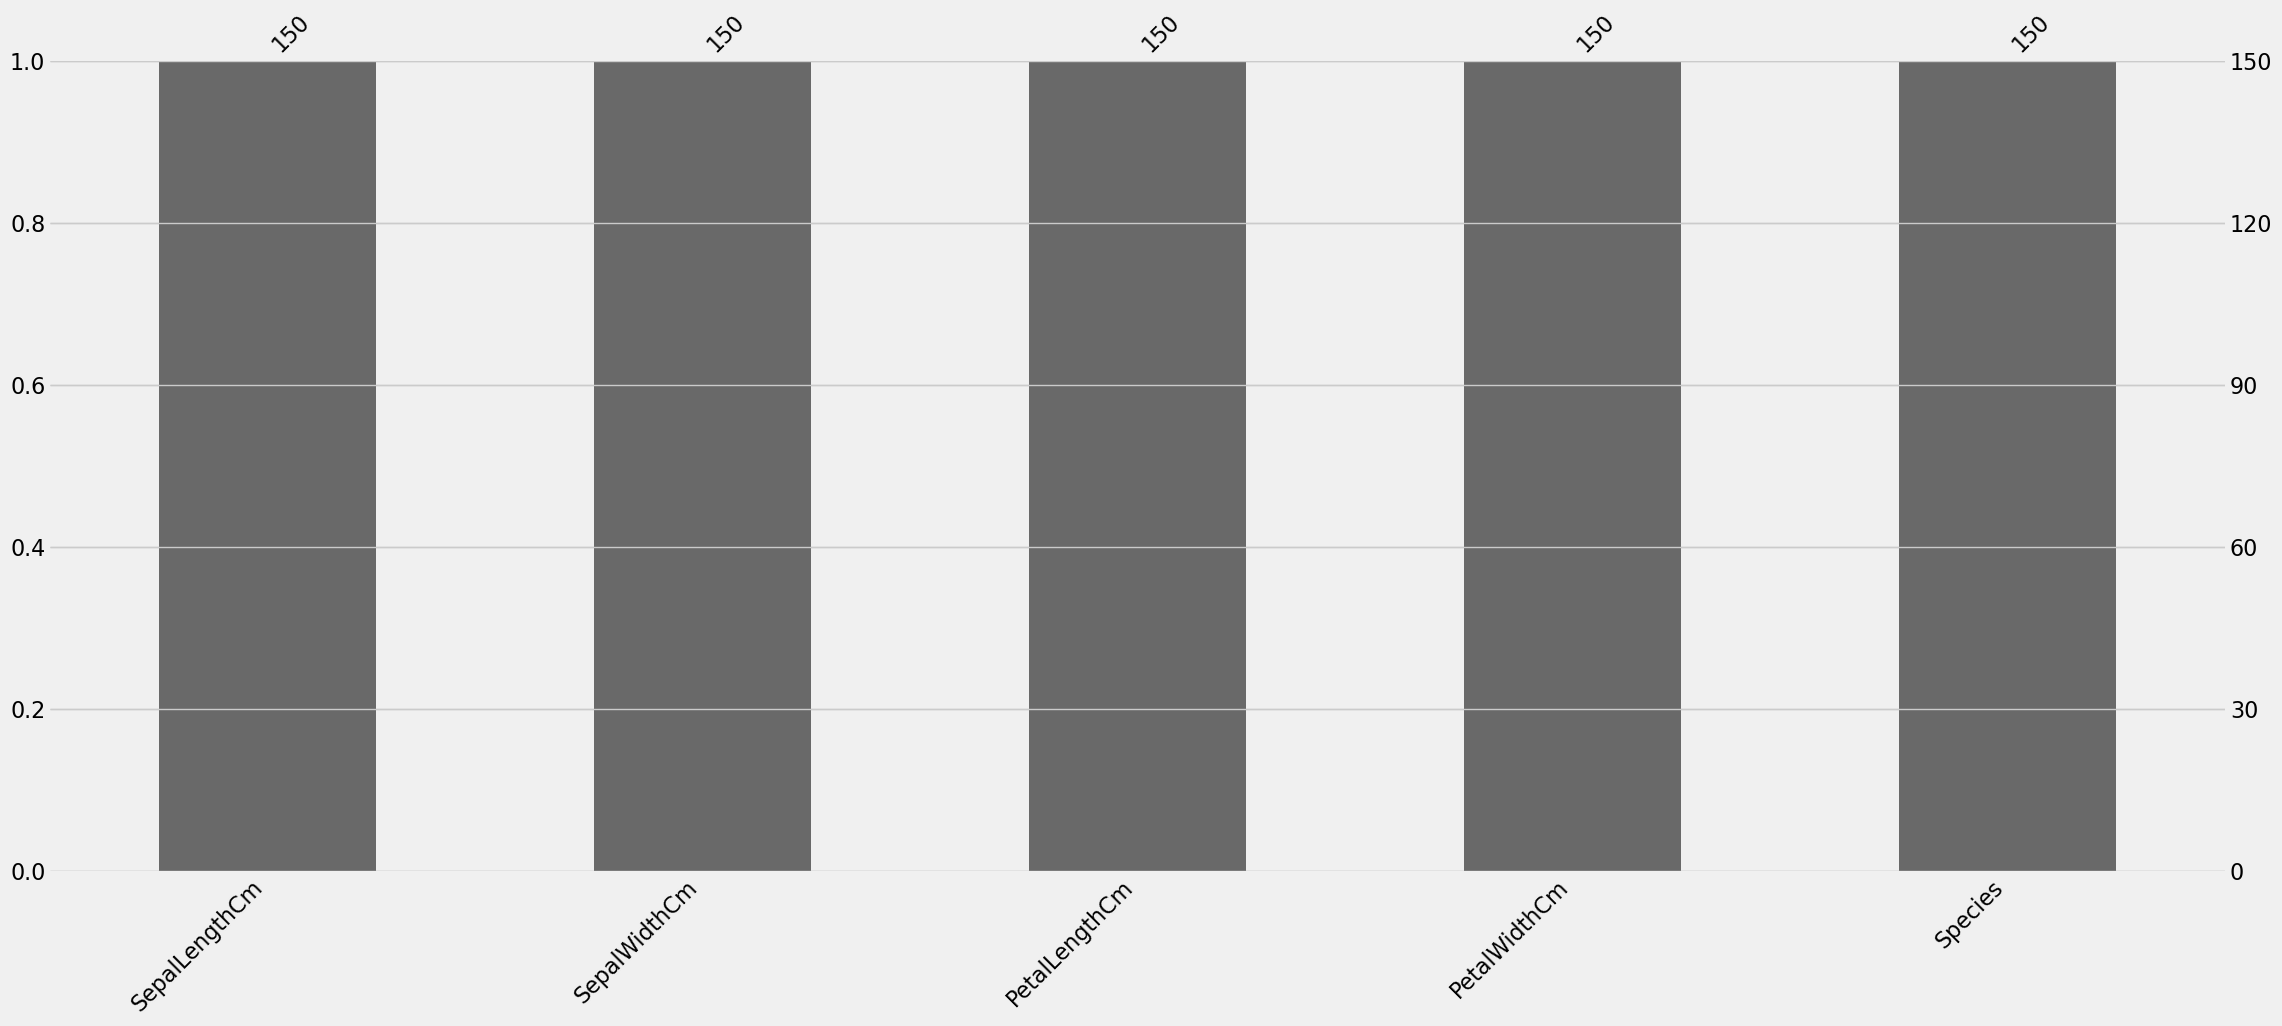

In [16]:
import missingno as msno
msno.bar(df)

In [17]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

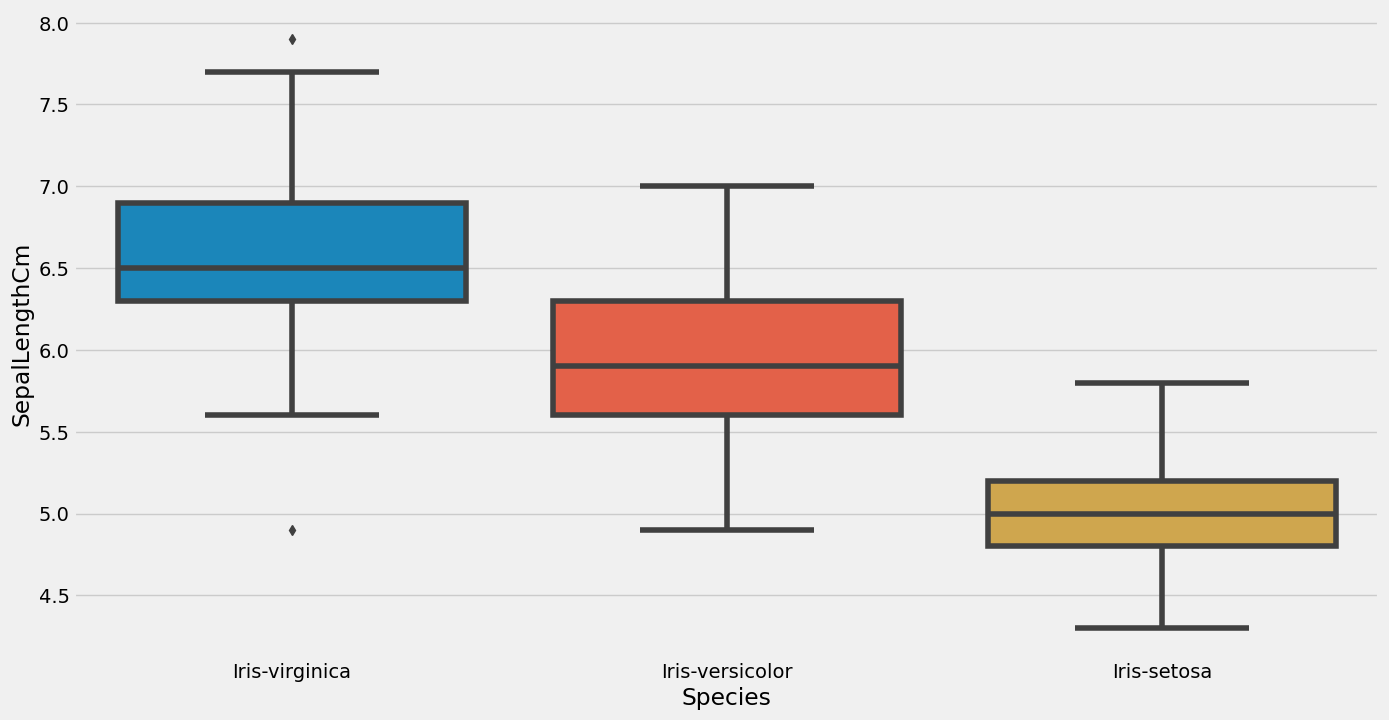

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

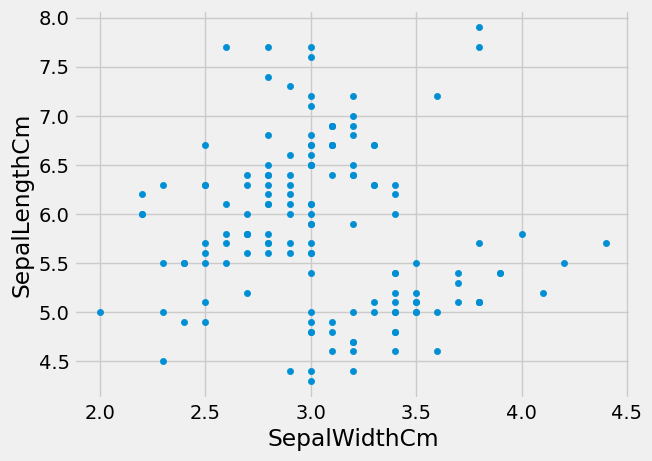

In [19]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

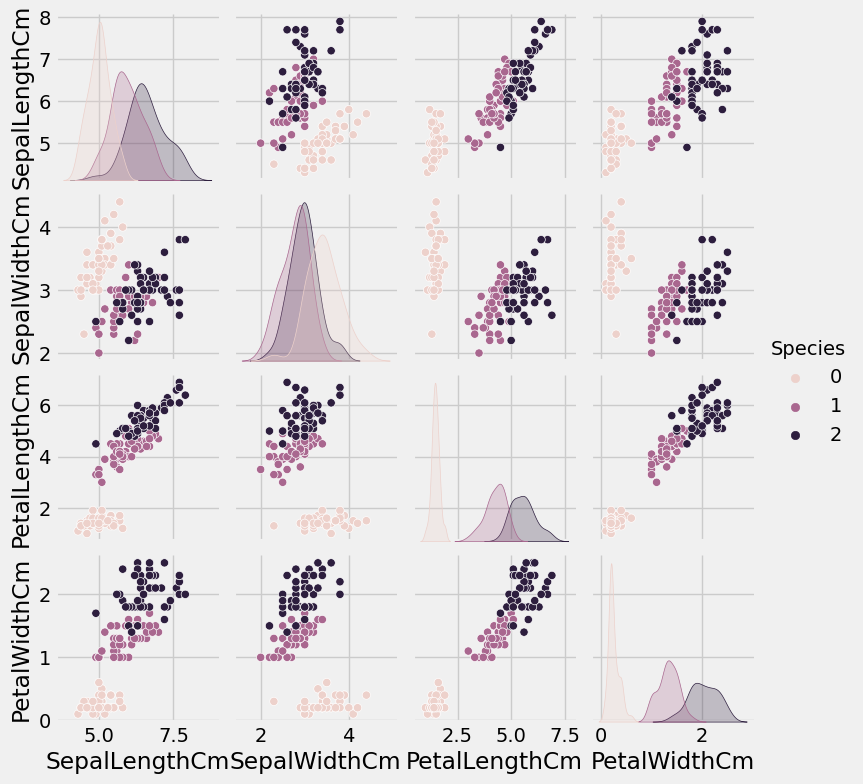

In [36]:
sns.pairplot(df, hue="Species", size=2)

In [20]:
x=df.drop('Species',axis=1)
y=df['Species']

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
y = to_categorical(df.Species)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=123)

In [25]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 94ms/step - loss: 1.2909 - accuracy: 0.2647 - val_loss: 1.1926 - val_accuracy: 0.0444
Epoch 2/45
4/4 [==============================] - 0s 12ms/step - loss: 1.1517 - accuracy: 0.0686 - val_loss: 1.1102 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0890 - accuracy: 0.3333 - val_loss: 1.0628 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0370 - accuracy: 0.3333 - val_loss: 1.0153 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 12ms/step - loss: 0.9911 - accuracy: 0.3333 - val_loss: 0.9713 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 14ms/step - loss: 0.9476 - accuracy: 0.3725 - val_loss: 0.9297 - val_accuracy: 0.5556
Epoch 7/45
4/4 [==============================] - 0s 13ms/step - loss: 0.9091 - accuracy: 0.6765 - val_loss: 0.8933 - val_accuracy: 0.8222
Epoch 8/45
4/4 [===========

In [28]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.9778


[0.4115295708179474, 0.9777777791023254]

In [29]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 100ms/step
[[0.01277354 0.3981591  0.58906746]
 [0.01221739 0.38421497 0.6035677 ]
 [0.09896339 0.6331163  0.26792035]
 [0.06931644 0.5878845  0.3427991 ]
 [0.88206524 0.10555317 0.01238155]
 [0.06322394 0.63677627 0.2999997 ]
 [0.0113913  0.30750418 0.68110454]
 [0.01287869 0.33158693 0.6555343 ]
 [0.88295364 0.10607052 0.01097584]
 [0.0254843  0.48416618 0.49034944]]


In [30]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [33]:
history.history['accuracy']

[0.2647058963775635,
 0.06862745434045792,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.37254902720451355,
 0.6764705777168274,
 0.9215686321258545,
 0.9411764740943909,
 0.8921568393707275,
 0.813725471496582,
 0.686274528503418,
 0.6666666865348816,
 0.6764705777168274,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.7058823704719543,
 0.8529411554336548,
 0.9509803652763367,
 0.9411764740943909,
 0.8725489974021912,
 0.8921568393707275,
 0.9509803652763367,
 0.9509803652763367,
 0.813725471496582,
 0.7647058963775635,
 0.8039215803146362,
 0.9117646813392639,
 0.9607843160629272,
 0.9607843160629272,
 0.9509803652763367,
 0.9215686321258545,
 0.9313725233078003,
 0.9411764740943909,
 0.9313725233078003,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9313725233078003,
 0.8921568393707275,
 0.9411764740943909,
 0.9607843160629272,
 0.9411764740943909]

In [34]:

history.history['val_accuracy']

[0.04444444552063942,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.5555555820465088,
 0.8222222328186035,
 0.9111111164093018,
 0.9111111164093018,
 0.7777777910232544,
 0.7111111283302307,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6888889074325562,
 0.7777777910232544,
 0.9111111164093018,
 0.9777777791023254,
 0.8888888955116272,
 0.800000011920929,
 0.9777777791023254,
 0.9333333373069763,
 0.8222222328186035,
 0.7555555701255798,
 0.7555555701255798,
 0.8222222328186035,
 0.9555555582046509,
 0.9777777791023254,
 0.9333333373069763,
 0.8222222328186035,
 0.8888888955116272,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.9333333373069763,
 0.8222222328186035,
 0.8222222328186035,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254]

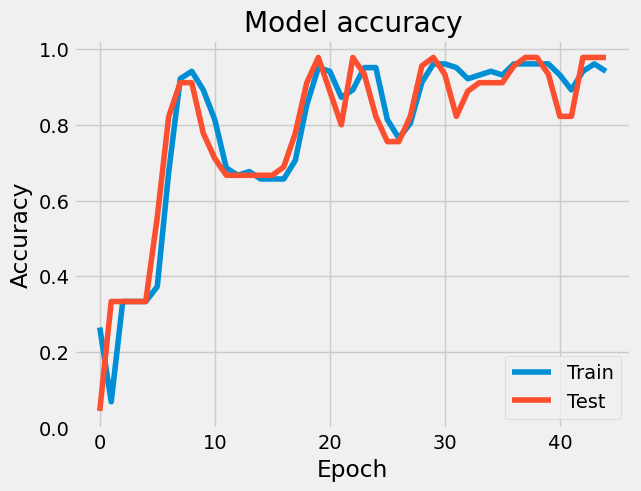

In [35]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()